In [1]:
#importing relevant libraries
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!

In [2]:
#pd.set_option('max_columns', None )
#pd.set_option('max_colwidth', None )

In [3]:
#importing the relevant files
#The genre files was created in excel. It is a list of genres not in json format

tmdb = pd.read_csv('TMDB_movies.csv')
tmbd_genre = pd.read_csv('tmdb_genres.csv')
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
tmdb_null = tmdb.isnull().sum()
tmdb_null
#nulls -
#homapge will not be used for analysis
#release_date and runtime nulls will be ignored durring anaylsis
#it is not necessary for a movie to have a tagline so the nulls here make sense

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
tmdb.shape

(4803, 20)

In [6]:
#creating a new table with just the columns needed

tmdb_n = tmdb[['id','title', 'budget', 'original_language', 'original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'status', 'tagline', 'vote_average', 'vote_count']]
tmdb_n.head(1)

,id,title,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,vote_average,vote_count
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800


In [7]:
#mean, max, min budget

print(tmdb_n['budget'].mean())
print(tmdb_n['budget'].max())
print(tmdb_n['budget'].min())
tmdb_n[['budget']].describe()

29045039.87528628
380000000
0


,budget
count,4.803000e+03
mean,2.904504e+07
std,4.072239e+07
min,0.000000e+00
25%,7.900000e+05
50%,1.500000e+07
75%,4.000000e+07
max,3.800000e+08


In [8]:
tmdb_n[['revenue']].describe()

,revenue
count,4.803000e+03
mean,8.226064e+07
std,1.628571e+08
min,0.000000e+00
25%,0.000000e+00
50%,1.917000e+07
75%,9.291719e+07
max,2.787965e+09


In [9]:
tmbd_genre_null = tmbd_genre.isnull().sum()
tmbd_genre_null

id            0
genre_id      0
genre_name    0
dtype: int64

In [10]:
tmbd_genre.shape

(12160, 3)

In [11]:
#joining the genre table and the new tmdb table

tmdb_n_genre = tmdb_n.join(tmbd_genre.set_index(["id"]), on=["id"])
tmdb_n_genre.head()

,id,title,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,vote_average,vote_count,genre_id,genre_name
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,28.0,Action
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,12.0,Adventure
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,14.0,Fantasy
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,878.0,Science Fiction
1,285,Pirates of the Caribbean: At World's End,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,12.0,Adventure


In [12]:
#creating budget and revenue averages by genres

budget_genre = tmdb_n_genre.groupby('genre_name')[['budget']].mean()
revenue_genre = tmdb_n_genre.groupby('genre_name')[['revenue']].mean()
budget_genre.describe()

,budget
count,2.000000e+01
mean,3.172614e+07
std,2.078983e+07
min,6.580884e+05
25%,1.921051e+07
50%,2.887664e+07
75%,5.091732e+07
max,6.646590e+07


In [13]:
revenue_genre.reset_index(inplace=True)
revenue_genre.describe()

,revenue
count,2.000000e+01
mean,8.913783e+07
std,6.799229e+07
min,0.000000e+00
25%,4.790346e+07
50%,6.872008e+07
75%,1.440240e+08
max,2.256930e+08


In [14]:
budget_genre.reset_index(inplace=True)
budget_genre['budget'].describe()

count    2.000000e+01
mean     3.172614e+07
std      2.078983e+07
min      6.580884e+05
25%      1.921051e+07
50%      2.887664e+07
75%      5.091732e+07
max      6.646590e+07
Name: budget, dtype: float64

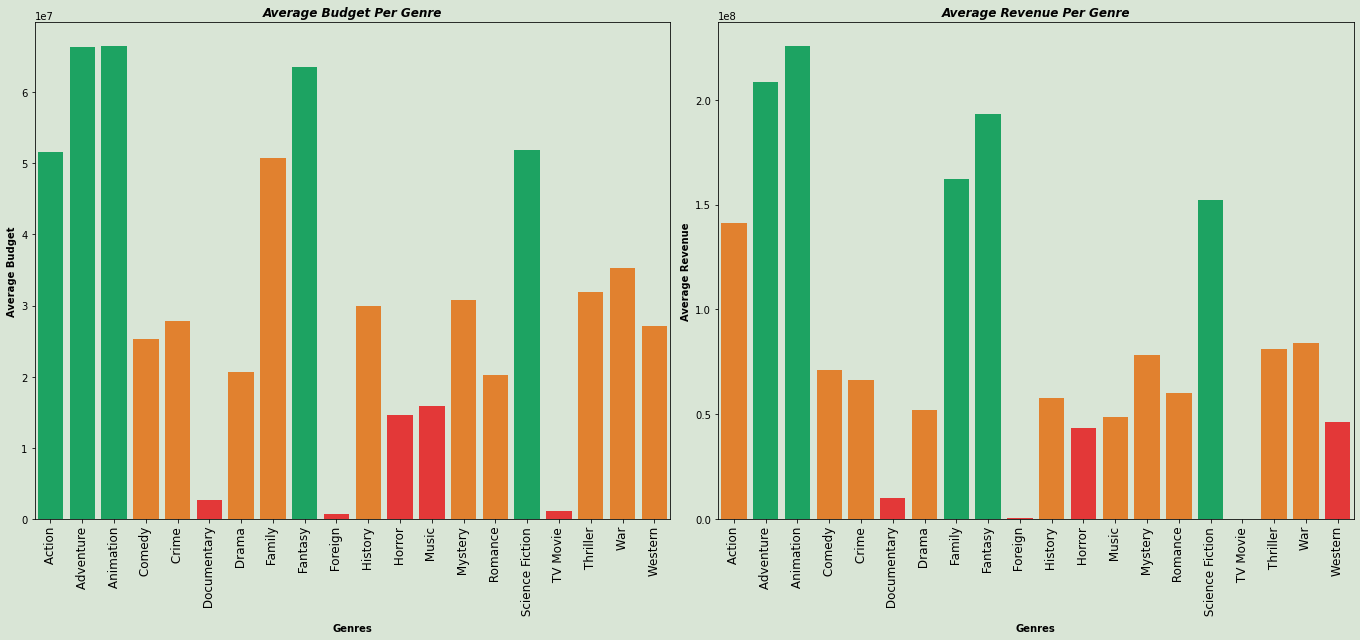

In [70]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(19, 9))

#budget plot
height_color_budget = [{h<budget_genre['budget'].quantile(0.25): '#FF1B1C', 
                 budget_genre['budget'].quantile(0.25)<=h<=budget_genre['budget'].quantile(0.75): '#FF7F11', 
                 h>budget_genre['budget'].quantile(0.75): '#06BA63'}[True] for h in budget_genre['budget']]

sns.barplot(data = budget_genre,
            x = 'genre_name',
           y = 'budget',
           palette = height_color_budget,
           ax=axes[0])

axes[0].set_title('Average Budget Per Genre',
                 fontweight='bold', 
                  style='italic')

axes[0].tick_params(axis='x',
                 labelsize ='large', 
                    rotation=90)

axes[0].set_xlabel('Genres',
                  fontweight = 'heavy')

axes[0].set_ylabel('Average Budget',
                  fontweight = 'heavy')
#change axis plot background colour
axes[0].patch.set_facecolor('#D9E5D6')

#revenue plot
height_color_revenue = [{h<revenue_genre['revenue'].quantile(0.25): '#FF1B1C', 
                 revenue_genre['revenue'].quantile(0.25)<=h<=revenue_genre['revenue'].quantile(0.75): '#FF7F11', 
                 h>revenue_genre['revenue'].quantile(0.75): '#06BA63'}[True] for h in revenue_genre['revenue']]

sns.barplot(data = revenue_genre,
            x = 'genre_name',
           y = 'revenue',
           palette = height_color_revenue,
           ax=axes[1])

axes[1].set_title('Average Revenue Per Genre',
                 fontweight='bold', 
                  style='italic')

axes[1].tick_params(axis='x', 
                    rotation=90,
                 labelsize ='large')

axes[1].set_xlabel('Genres',
          fontweight = 'heavy')

axes[1].set_ylabel('Average Revenue',
          fontweight = 'heavy')

#change axis plot background colour
axes[1].patch.set_facecolor('#D9E5D6')

#change background colour
fig.patch.set_facecolor('#D9E5D6')

# Adjust layout to prevent overlap
plt.tight_layout()

#show plot
plt.show()

In [17]:
tmdb_n_genre['Profit'] = tmdb_n_genre['revenue'] - tmdb_n_genre['budget']
tmdb_n_genre.head(2)

,id,title,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,vote_average,vote_count,genre_id,genre_name,Profit
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,28.0,Action,2550965087
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,12.0,Adventure,2550965087


In [18]:
tmdb_n_genre_action = tmdb_n_genre.loc[tmdb_n_genre['genre_name'] == ' Action', : ]
tmdb_n_genre_adv = tmdb_n_genre.loc[tmdb_n_genre['genre_name'] == ' Adventure', : ]
tmdb_n_genre_ani = tmdb_n_genre.loc[tmdb_n_genre['genre_name'] == ' Animation', : ]

action = tmdb_n_genre_action.sort_values(by = 'revenue', ascending = False).head(10)
adventure = tmdb_n_genre_adv.sort_values(by = 'revenue', ascending = False).head(10)
animation = tmdb_n_genre_ani.sort_values(by = 'revenue', ascending = False).head(10)

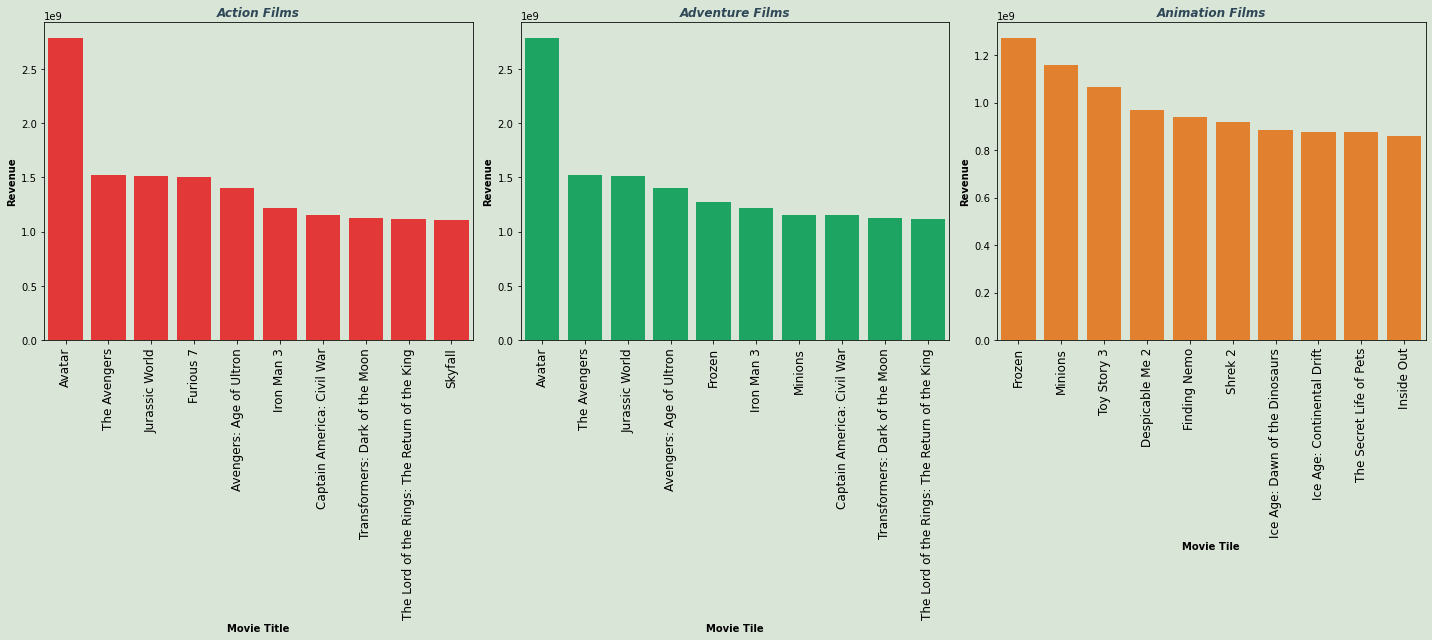

In [72]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 9))

#action plot
sns.barplot(data = action,
            x = 'title',
           y = 'revenue',
           color = '#FF1B1C',
           ax=axes[0])

axes[0].set_title('Action Films',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

axes[0].tick_params(axis='x', 
                    rotation=90,
                   labelsize = 'large')

axes[0].set_xlabel('Movie Title',
                  fontweight = 'heavy')

axes[0].set_ylabel('Revenue',
                  fontweight = 'heavy')

#change axis plot background colour
axes[0].patch.set_facecolor('#D9E5D6')

#adventure plot
sns.barplot(data = adventure,
            x = 'title',
           y = 'revenue',
           color = '#06BA63',
           ax=axes[1])

axes[1].set_title('Adventure Films',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

axes[1].tick_params(axis='x', 
                    rotation=90,
                   labelsize = 'large')

axes[1].set_xlabel('Movie Tile',
                  fontweight = 'heavy')

axes[1].set_ylabel('Revenue',
                  fontweight = 'heavy')

#change axis plot background colour
axes[1].patch.set_facecolor('#D9E5D6')

#animation plot
sns.barplot(data = animation,
            x = 'title',
           y = 'revenue',
           color = '#FF7F11',
           ax=axes[2])

axes[2].set_title('Animation Films',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

axes[2].tick_params(axis='x', 
                    rotation=90,
                   labelsize = 'large')

axes[2].set_xlabel('Movie Tile',
                  fontweight = 'heavy')

axes[2].set_ylabel('Revenue',
                  fontweight = 'heavy')

#change axis plot background colour
axes[2].patch.set_facecolor('#D9E5D6')

#change background colour
fig.patch.set_facecolor('#D9E5D6')

# Adjust layout to prevent overlap
plt.tight_layout()

#show plot
plt.show()

In [20]:
tmdb_n.head(2)

,id,title,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,tagline,vote_average,vote_count
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500


In [21]:
tmdb_tr = tmdb[['title', 'popularity', 'runtime', 'vote_average', 'vote_count']]
tmdb_tr.head(2)

,title,popularity,runtime,vote_average,vote_count
0,Avatar,150.437577,162.0,7.2,11800
1,Pirates of the Caribbean: At World's End,139.082615,169.0,6.9,4500


In [22]:
tmdb_trs = tmdb_tr.loc[(tmdb_tr['title'] == 'Avatar') | 
                       (tmdb_tr['title'] == 'Furious 7') | 
                       (tmdb_tr['title'] == 'Avengers: Age of Ultron') | 
                       (tmdb_tr['title'] == 'Frozen') | 
                       (tmdb_tr['title'] == 'Iron Man 3'), : ]
tmdb_trs

,title,popularity,runtime,vote_average,vote_count
0,Avatar,150.437577,162.0,7.2,11800
7,Avengers: Age of Ultron,134.279229,141.0,7.3,6767
31,Iron Man 3,77.682080,130.0,6.8,8806
44,Furious 7,102.322217,137.0,7.3,4176
124,Frozen,165.125366,102.0,7.3,5295


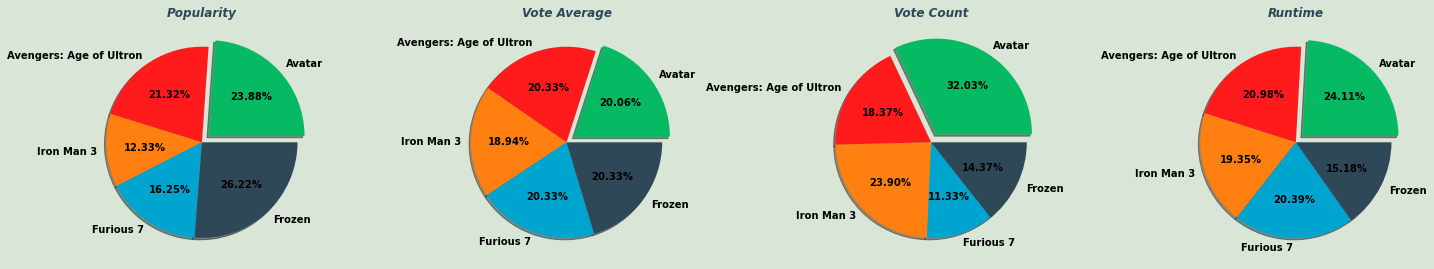

In [65]:
# Create a figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

#Popularity plot
axes[0].pie(tmdb_trs['popularity'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
        shadow = True,
        textprops={'color': 'black', 'fontweight': 'bold'})

axes[0].set_title('Popularity',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

#vote_average plot
axes[1].pie(tmdb_trs['vote_average'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
           shadow = True,
           textprops={'color': 'black', 'fontweight': 'bold'})

axes[1].set_title('Vote Average',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

#vote_count plot
axes[2].pie(tmdb_trs['vote_count'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
           shadow = True,
           textprops={'color': 'black', 'fontweight': 'bold'})

axes[2].set_title('Vote Count',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

#runtime plot
axes[3].pie(tmdb_trs['runtime'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
           shadow = True,
           textprops={'color': 'black', 'fontweight': 'bold'})

axes[3].set_title('Runtime',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

fig.patch.set_facecolor('#D9E5D6')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()